In [ ]:
#Principal Component Analysis and Singular Value Decomposition Models Project
#Done By: Layth Al-Nemri

# Part 1: Applying PCA

1. Compute the covariance matrix of the dataframe.
2. Write a function `get_sorted_eigen(df_cov)` that gets the covariance matrix of dataframe `df` (from step 1), and returns sorted eigenvalues and eigenvectors using `np.linalg.eigh`.
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`.
4. How many PCs do you need to cover 99% of the dataset's variance?

PCA needed to cover 99% of the dataset's variance = 9
5. Plot the first 16 principal components (Eigenvectors) as a time series (16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element) .
6. Compare the first two PCs with the rest of them. Do you see any difference in their trend?

PC1 can be intrepreted as general value increase around the year, and PC2 would be the same but less sensitive to minor changes.
When comparing PC1,PC2 to PC3,PC4 you can see the periodics are still there but with more "character" or more "distrotion, it still increases and decrease almost the same periods.
PC1,PC2 vs PC5,PC6 the value increase and decrease are not in sync but they can still be seen as periodic.
And the rest of the graphs have fluctuating data with no noticeable pattern, which means these are distinct character for each data point.

In [ ]:
import pandas as pd
data_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/Sabaae/Dataset/main/TemperaturesbyCity.csv',
    index_col=0
)

In [ ]:
data_raw

1992-01-01  1992-02-01  1992-03-01  1992-04-01  1992-05-01  \
City                                                                   
A Coruña       7.053       9.548      11.154      12.322      15.951   
Aachen         1.492       3.867       6.179       8.231      14.977   
Aalborg        3.148       3.891       4.578       5.868      13.822   
Aba           26.090      28.293      28.755      28.334      27.305   
Abadan        10.283      13.018      15.789      23.541      29.505   
...              ...         ...         ...         ...         ...   
Århus          3.148       3.891       4.578       5.868      13.822   
Çorlu          3.563       2.850       6.930      11.577      14.750   
Çorum         -3.209      -2.546       3.744       9.299      12.780   
Öskemen       -9.365     -12.908      -9.790       3.892      12.488   
Ürümqi       -12.445      -9.708      -1.082      11.655      16.550   

          1992-06-01  1992-07-01  1992-08-01  1992-09-01  1992-10-01  ...  \
City                                                                  ...   
A Coruña      15.312      19.686      18.823      16.474      12.558  ...   
Aachen        16.608      18.689      18.689      14.240       6.996  ...   
Aalborg       18.477      17.836      16.108      13.398       6.338  ...   
Aba           26.121      25.289      25.287      25.681      25.933  ...   
Abadan        34.483      35.475      35.706      33.093      26.394  ...   
...              ...         ...         ...         ...         ...  ...   
Århus         18.477      17.836      16.108      13.398       6.338  ...   
Çorlu         20.510      21.534      24.625      19.128      17.421  ...   
Çorum         17.550      18.765      21.050      15.027      12.990  ...   
Öskemen       15.539      19.302      15.734       6.899       3.337  ...   
Ürümqi        21.596      23.253      20.733      12.910       6.112  ...   

          2006-03-01  2006-04-01  2006-05-01  2006-06-01  2006-07-01  \
City                                                                   
A Coruña      11.524      13.307      15.582      18.737      20.813   
Aachen         3.135       8.432      13.886      17.216      22.812   
Aalborg       -0.591       6.229      12.205      16.004      20.387   
Aba           29.319      28.716      27.306      27.284      26.697   
Abadan        21.011      25.701      32.999      36.955      37.443   
...              ...         ...         ...         ...         ...   
Århus         -0.591       6.229      12.205      16.004      20.387   
Çorlu          8.176      12.514      17.097      21.301      23.200   
Çorum          6.441      10.458      14.237      19.260      20.501   
Öskemen       -4.790       3.547      11.021      18.915      18.576   
Ürümqi        -0.234      11.193      16.991      23.014      24.299   

          2006-08-01  2006-09-01  2006-10-01  2006-11-01  2006-12-01  
City                                                                  
A Coruña      20.338      18.751      16.542      13.841       9.305  
Aachen        15.807      17.873      13.147       7.956       4.689  
Aalborg       17.841      16.521      11.868       7.668       6.563  
Aba           26.129      26.291      27.092      26.976      26.793  
Abadan        37.944      33.426      29.766      19.533      11.235  
...              ...         ...         ...         ...         ...  
Århus         17.841      16.521      11.868       7.668       6.563  
Çorlu         25.392      19.994      15.765       9.437       6.058  
Çorum         24.268      16.935      12.492       4.409      -0.235  
Öskemen       15.543      12.014       3.804      -1.890      -7.880  
Ürümqi        23.741      17.198      10.287       1.291     -10.381  

[3448 rows x 180 columns]

(180, 180)


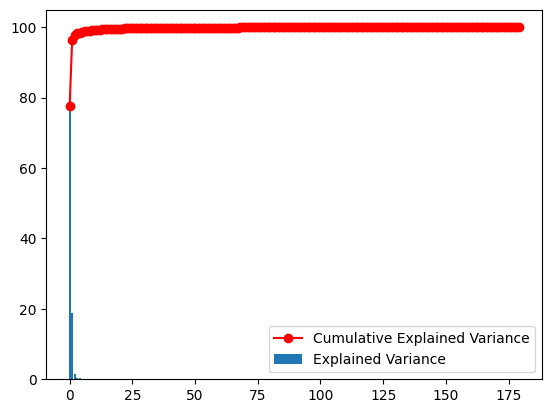

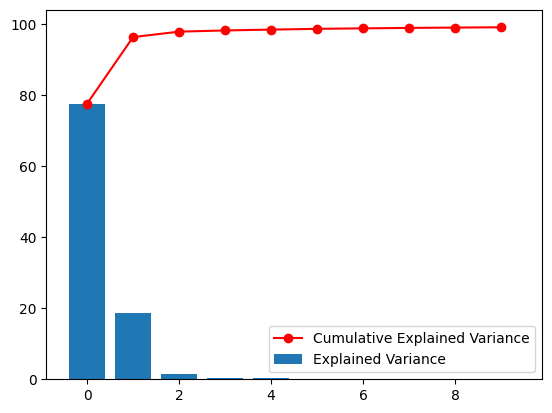

PCA needed to cover 99% = 9


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data_raw_std = StandardScaler().fit_transform(data_raw)
n, m = data_raw_std.shape
C = np.dot(data_raw_std.T, data_raw_std) / (n-1)
print(C.shape)

#eigenValues, eigenVectors = np.linalg.eigh(df_cov)
#eigenValues, eigenVectors
#type(eigenValues), type(eigenVectors)
#eigenValues.shape, eigenVectors.shape
def get_sorted_eigen(df_cov):
  eigenValues, eigenVectors = np.linalg.eigh(df_cov)
  args = (-eigenValues).argsort()
  eigenValues_sorted = eigenValues[args]
  eigenVectors_sorted = eigenVectors[:, args]
  return eigenValues_sorted, eigenVectors_sorted

first_Values, first_Vectors = get_sorted_eigen(C)

eigValSum = sum(first_Values)
expVar = [eigV/eigValSum*100 for eigV in first_Values]
cumExpVar = np.cumsum(expVar)

plt.bar(range(180), expVar, label='Explained Variance')
plt.plot(cumExpVar, 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()

plt.bar(range(10), expVar[:10], label='Explained Variance')
plt.plot(cumExpVar[:10], 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()

for i,v in enumerate(cumExpVar):
  if v > 99:
    print('PCA needed to cover 99% =',(i+1))
    break

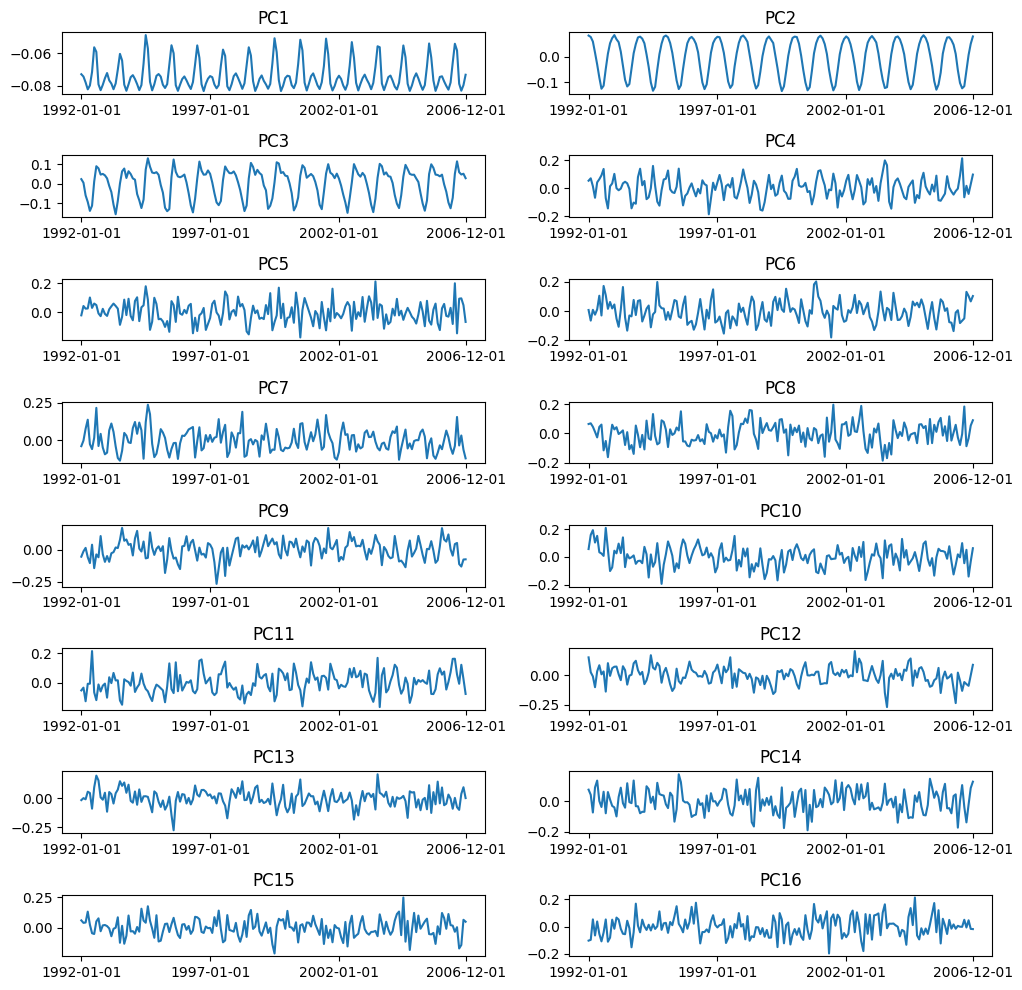

In [ ]:
#type(first_Vectors)
df_first_Vectors = pd.DataFrame(first_Vectors)
df_first_Vectors.set_index(data_raw.columns, inplace=True)
#print(df_first_Vectors)
#fig, axes = plt.subplots(8, 2, figsize=(12,15))
x_ticks = ['1992-01-01','1997-01-01','2002-01-01','2006-12-01']

#plt.plot(df_first_Vectors.index,df_first_Vectors[0])
#graph_title = 'PC 1'
#plt.title(graph_title)
#plt.xticks(ticks = x_ticks, minor = False)
plt.figure(figsize=(12, 12))
for i in range(16):
  plt.subplot(8, 2, (i+1))
  plt.plot(df_first_Vectors.index,df_first_Vectors[i])
  graph_title = 'PC'+ str(i+1)
  plt.title(graph_title)
  plt.xticks(ticks = x_ticks, minor = False)
plt.subplots_adjust(hspace=1)

#for i in range(16):
#  axes.flat[i].plot(df_first_Vectors.index,df_first_Vectors[i])
#  graph_title = 'PC'+ str(i+1)
#  plt.title(graph_title)
#  plt.xticks(ticks = x_ticks, minor = False)

# Part 2: Data reconstruction

Create a function that:

*   Accepts a city and the original dataset as inputs.
*   Calls useful functions that you designed in previous parts to compute eigenvectors and eigenvalues.
*   Plots 4 figures:
  1.   The original time-series for the specified city.
  2.   The incremental reconstruction of the **original** (not standardized) time-series for the specified city in a single plot.
       * You should at least show 5 curves in a figure for incremental reconstruction. For example, you can pick the following (or any other combination that you think is reasonable):
          * Reconstruction with only PC1
          * Reconstruction with both PC1 and PC2
          * Reconstruction with PC1 to PC4 (First 4 PCs)
          * Reconstruction with PC1 to PC8 (First 8 PCs)
          * Reconstruction with PC1 to PC16 (First 16 PCs)

  3.   The residual error for your best reconstruction with respect to the original time-series.
      * Hint: You are plotting the error that we have for reconstructing each month `(df - df_reconstructed)`. On the x-axis, you have dates, and on the y-axis, the residual error.

      Best reconstruction is for 16 PC
  4.   The RMSE of the reconstruction as a function of the number of included components (x-axis is the number of components and y-axis is the RMSE). Sweep x-axis from 1 to 10 (this part is independent from part 3.2.)

Test your function using the `Yakeshi`, `Zamboanga`, `Norilsk`, `Juliaca`, and `Doha` as inputs.


In [ ]:
from sklearn.metrics import mean_squared_error
#original_df = data_raw
#city_name = 'Yakeshi'
def plot_city_figures(original_df, city_name):

  x_ticks = ['1992-01-01','1997-01-01','2002-01-01','2006-12-01']
  plt.plot(original_df.columns, original_df.loc[city_name])
  graph_title = 'Original Temp for ' + city_name
  plt.title(graph_title)
  plt.xlabel("Date")
  plt.ylabel("Temperature")
  plt.xticks(ticks = x_ticks, minor = False)
  plt.show()



  scalar = StandardScaler()
  data_std = scalar.fit_transform(original_df)
  df_data_std = pd.DataFrame(data_std, columns = original_df.columns , index = original_df.index)

  n, m = data_std.shape
  C2 = np.dot(data_std.T, data_std) / (n-1)
  second_Values, second_Vectors = get_sorted_eigen(C2)

  """for PC_no in range(5):
    W = second_Vectors[:, 0:((2**PC_no)-1)]
    proj = np.dot(df_data_std.loc[city_name,:].values, second_Vectors[:, 0:((2**PC_no)-1)])
    recon1 = np.dot(proj, W.T)
    recon_O = scalar.inverse_transform(recon1.reshape(1, -1))

    l = 'PC1 - PC' + str(2**PC_no)
    plt.plot(recon_O, label = l)
    graph_title = 'incremental reconstruction of the original time-series for' + city_name
    plt.title(graph_title)
    plt.xlabel('Date')
    plt.legend()
    #plt.xticks(ticks = x_ticks, minor = False)"""

  recon1 = []

  for PC_no in range(5):
    W = second_Vectors[:, 0:((2**PC_no)-1)]
    proj = np.dot(df_data_std.loc[city_name,:].values, second_Vectors[:, 0:((2**PC_no)-1)])
    reconr = np.dot(proj, W.T)
    recon_O = scalar.inverse_transform(reconr.reshape(1, -1))
    recon1.append(recon_O.reshape(df_data_std.shape[1]))

  for PC_no in range(5):
    reconstruction_plot = recon1[PC_no]
    l = 'PC1 - PC' + str(2**PC_no)
    plt.plot(reconstruction_plot, label=l)
    graph_title = 'Incremental reconstruction of the original time-series for ' + city_name
    plt.title(graph_title)
    plt.xlabel('Date')
    plt.legend()
    #plt.xticks(ticks = x_ticks, minor = False)
  plt.show()



  #Best reconstruction is for 16 PC
  W = second_Vectors[:, 0:16]
  proj = np.dot(df_data_std.loc[city_name,:].values, second_Vectors[:, 0:16])
  reconr = np.dot(proj, W.T)
  recon2 = scalar.inverse_transform(reconr.reshape(1, -1))
  #print(recon2)
  #print(recon2.size)
  #print(original_df.loc[city_name,:].values)
  #print(original_df.loc[city_name,:].values.size)
  residual_error = recon2 - original_df.loc[city_name,:].values
  #print(residual_error)
  #print(type(residual_error))
  df_residual_error = pd.DataFrame(residual_error)
  df_residual_error.columns = original_df.columns
  #print(df_residual_error)
  plt.plot(df_residual_error.columns, df_residual_error.loc[0,:])
  graph_title = 'Residual error after constructing on 16 PC for ' + city_name
  plt.title(graph_title)
  plt.xlabel('Date')
  plt.xticks(ticks = x_ticks, minor = False)
  plt.show()



  recon3 = []

  for PC_no in range(10):
    W = second_Vectors[:, 0:PC_no]
    proj = np.dot(df_data_std.loc[city_name,:].values, second_Vectors[:, 0:PC_no])
    reconr = np.dot(proj, W.T)
    recon_O = scalar.inverse_transform(reconr.reshape(1, -1))
    recon3.append(recon_O.reshape(df_data_std.shape[1]))

  RMSE = []

  for PC_no in range(10):
    residual = recon3[PC_no] - original_df.loc[city_name,:].values
    RMSE_PC = (mean_squared_error(original_df.loc[city_name,:].values, recon3[PC_no].reshape(-1))) ** 0.5
    RMSE.append(RMSE_PC)
  df_RMSE = pd.DataFrame(RMSE)
  df_RMSE.index = df_RMSE.index + 1
  plt.plot(df_RMSE)
  graph_title = 'Reconstruction RMSE of the first 10 PC for ' + city_name
  plt.title(graph_title)
  plt.xlabel('Number of PC')
  plt.ylabel("RMSE")

  plt.tight_layout()
  plt.show()

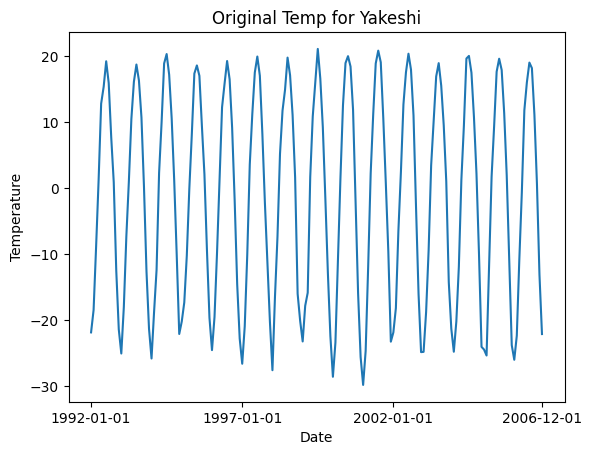

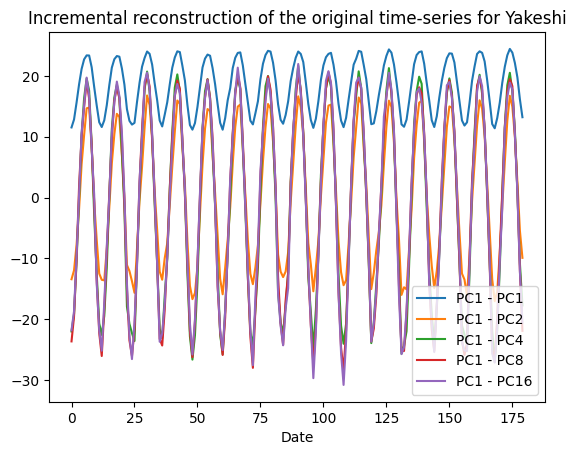

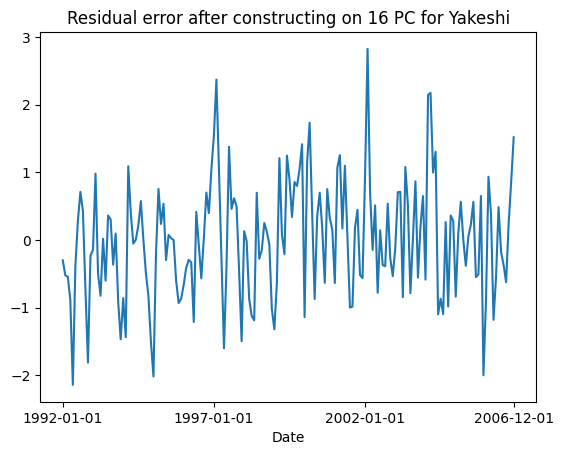

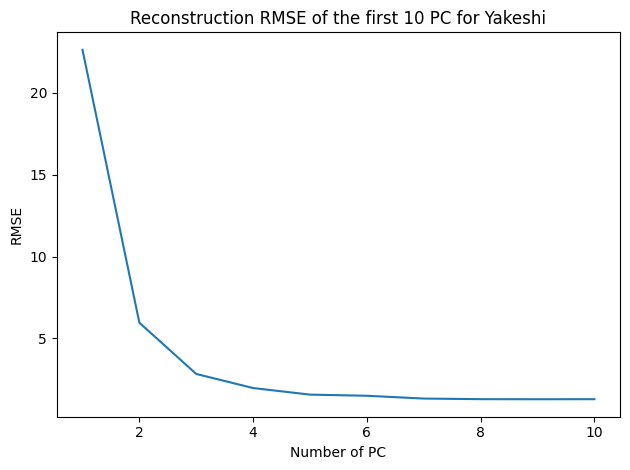

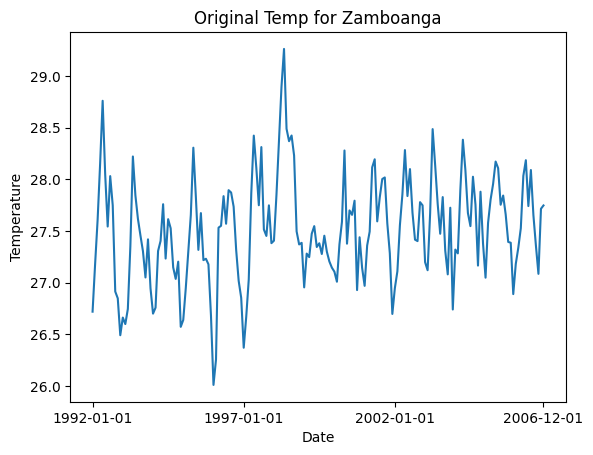

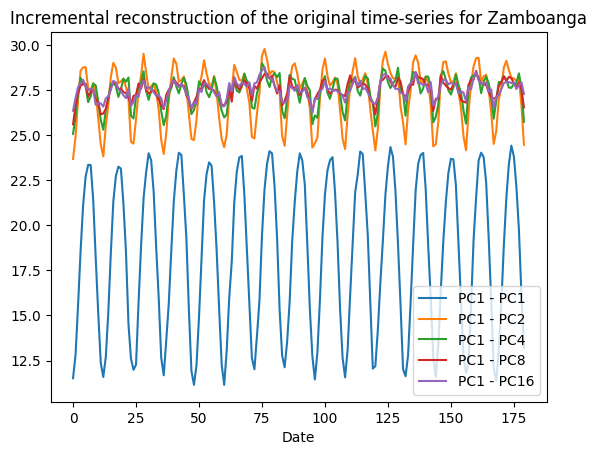

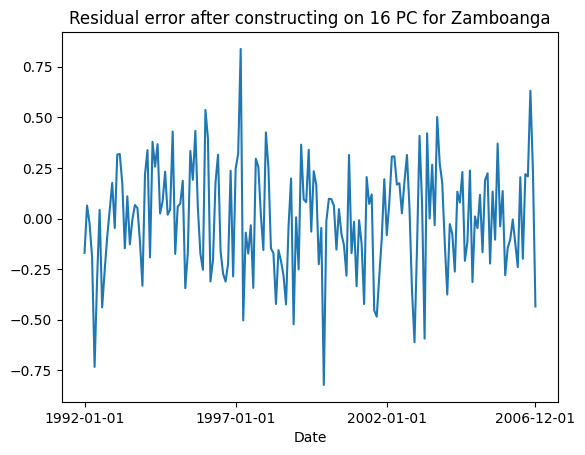

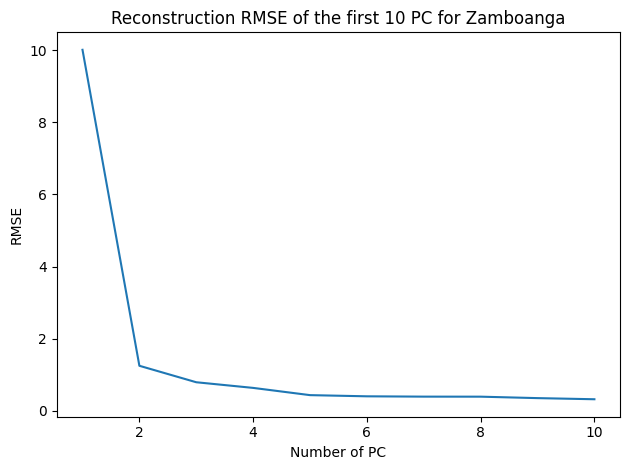

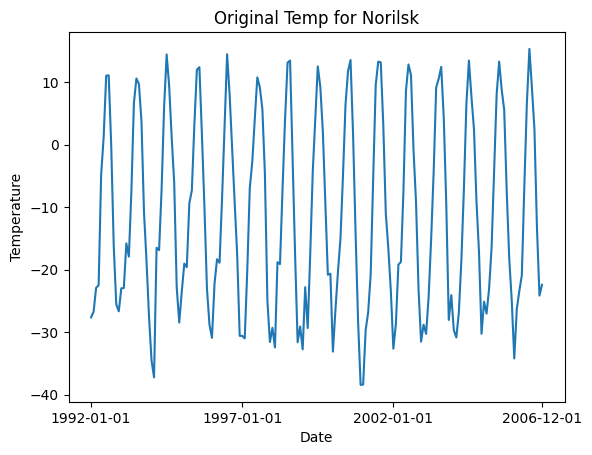

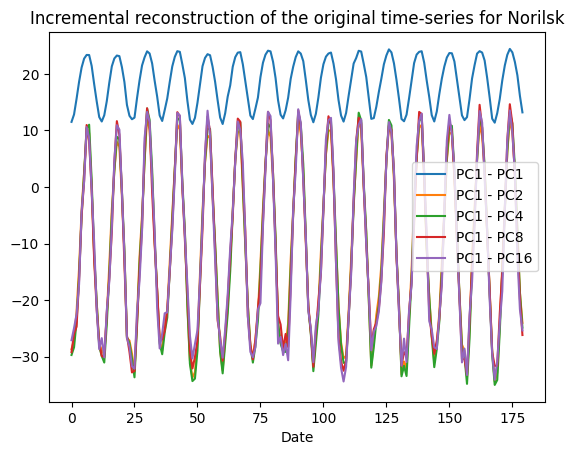

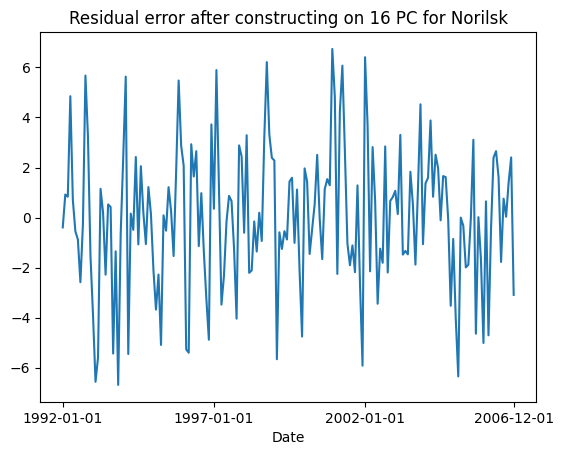

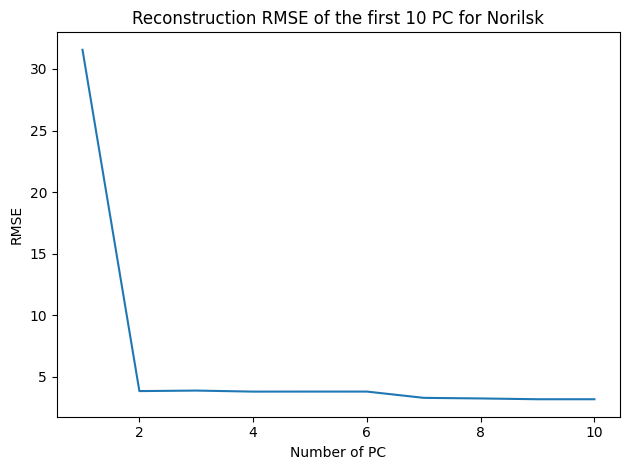

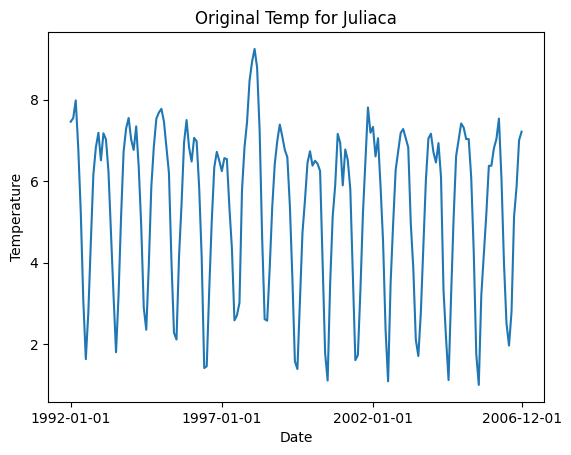

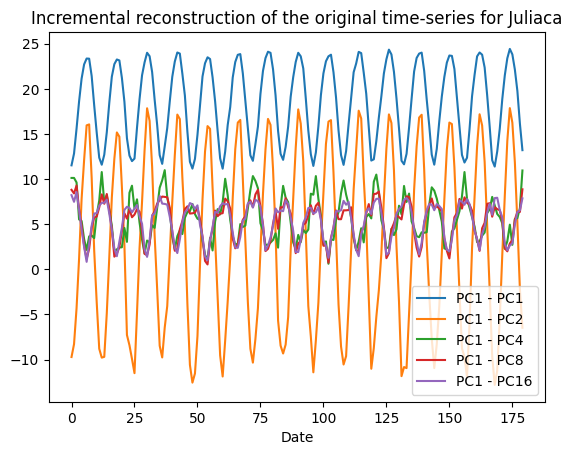

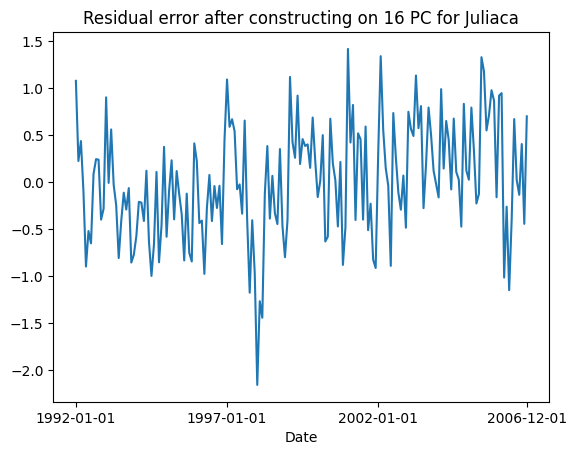

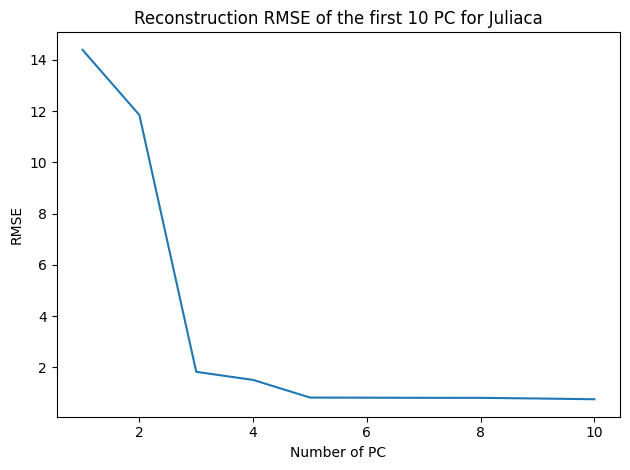

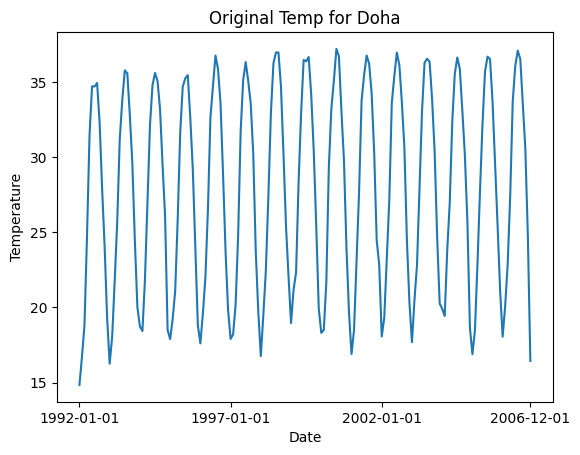

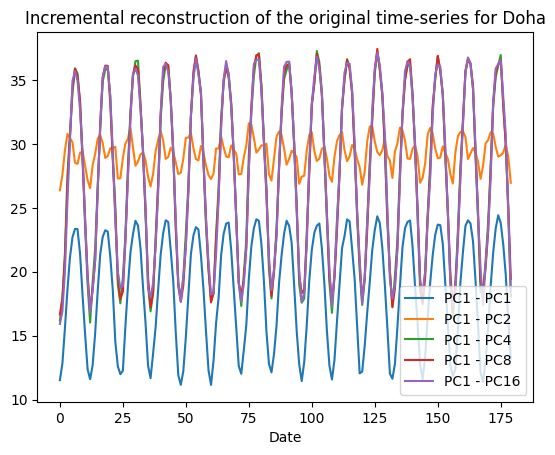

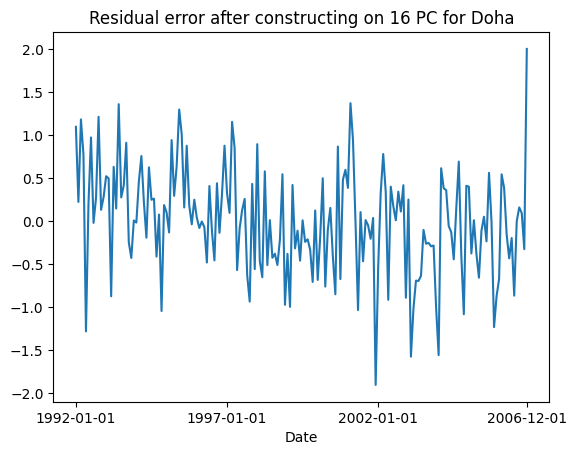

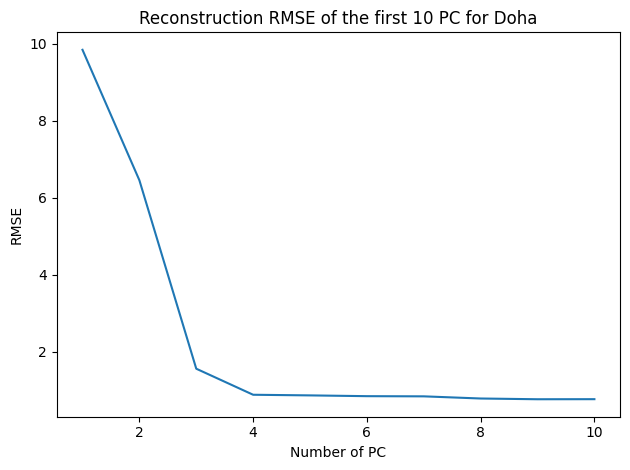

In [ ]:
cities = ['Yakeshi', 'Zamboanga', 'Norilsk', 'Juliaca', 'Doha']
for city in cities:
  plot_city_figures(data_raw, city)

# Part 3: SVD
Modify your code in part 3 to use SVD instead of PCA for extracting the eigenvectors.

Explain if standardization or covariance computation is required for this part.
Repeat part 3 and compare your PCA and SVD results. Write a function to make this comparison, and comment on the results.

The residual error in PCA was lower, close in some cases where the values are generally above 0.

Standardization and covariance are needed for SVD since we get what acts like eigenvalues in PCA, so we need to stabilize the data and get them around a mean of 0.

In [ ]:
def get_sorted_SVD(df_cov):
  U, S, V = np.linalg.svd(df_cov, full_matrices=True)
  return U, S, V

def plot_city_figures_SVD(original_df, city_name):

  x_ticks = ['1992-01-01','1997-01-01','2002-01-01','2006-12-01']
  plt.plot(original_df.columns, original_df.loc[city_name])
  graph_title = 'Original Temp for ' + city_name
  plt.title(graph_title)
  plt.xlabel("Date")
  plt.ylabel("Temperature")
  plt.xticks(ticks = x_ticks, minor = False)
  plt.show()



  scalar = StandardScaler()
  data_std = scalar.fit_transform(original_df)
  df_data_std = pd.DataFrame(data_std, columns = original_df.columns , index = original_df.index)

  n, m = data_std.shape
  C3 = np.dot(data_std.T, data_std) / (n-1)
  U, S, V = get_sorted_SVD(C3)

  #Best reconstruction is for 16 PC
  reconr = np.dot(U[:, :16], np.dot(np.diag(S[:16]), V[:16, :]))
  recon5 = scalar.inverse_transform(reconr)
  residual_error = recon5 - original_df.loc[city_name,:].values
  df_residual_error = pd.DataFrame(residual_error)
  df_residual_error.columns = original_df.columns
  plt.plot(df_residual_error.columns, df_residual_error.loc[0,:])
  graph_title = 'SVD Residual error after constructing on 16 PC for ' + city_name
  plt.title(graph_title)
  plt.xlabel('Date')
  plt.xticks(ticks = x_ticks, minor = False)
  plt.show()

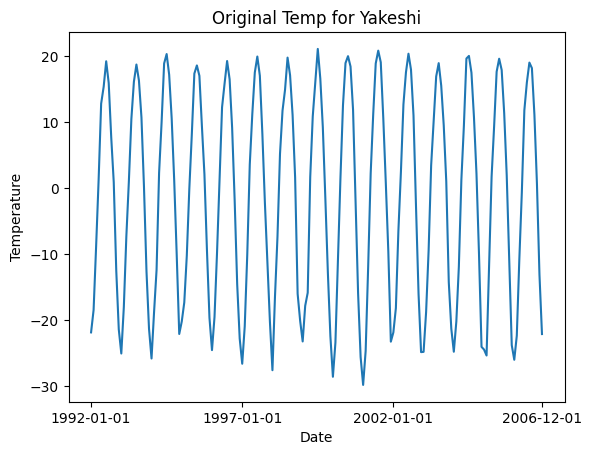

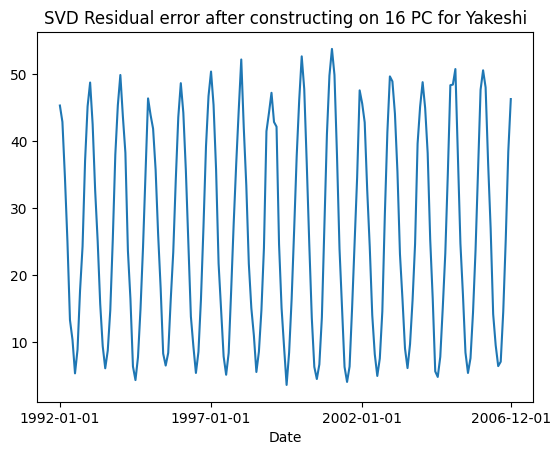

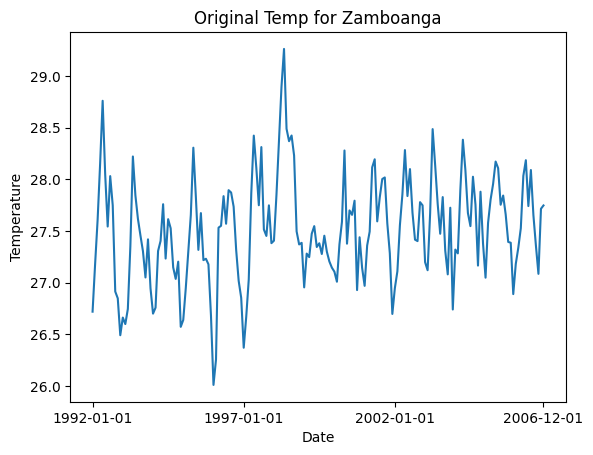

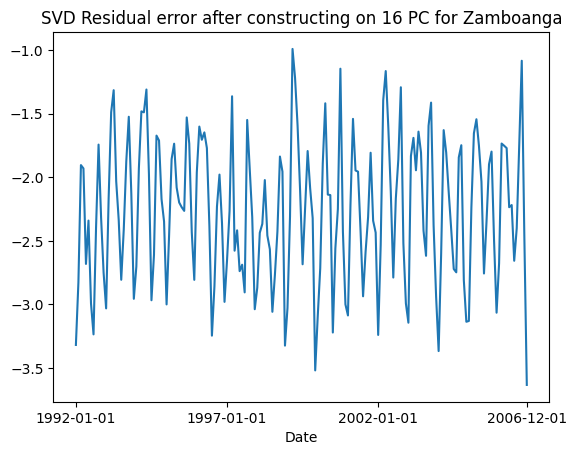

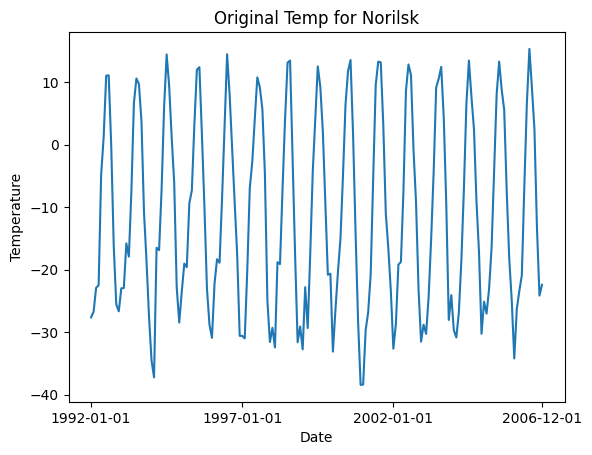

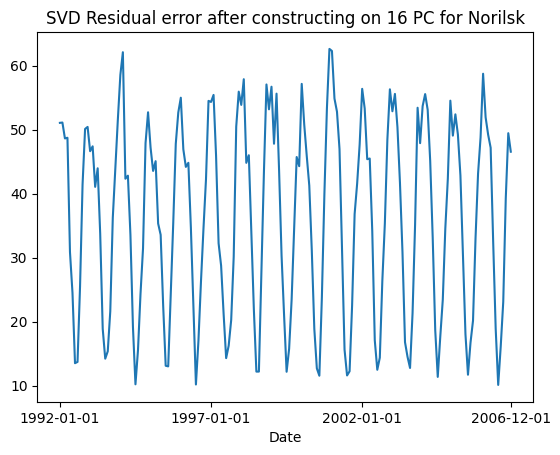

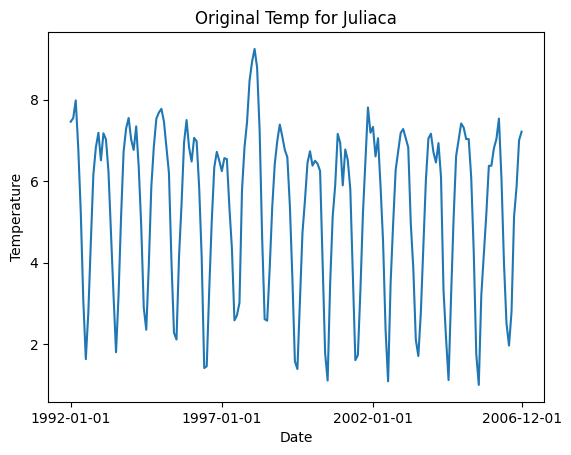

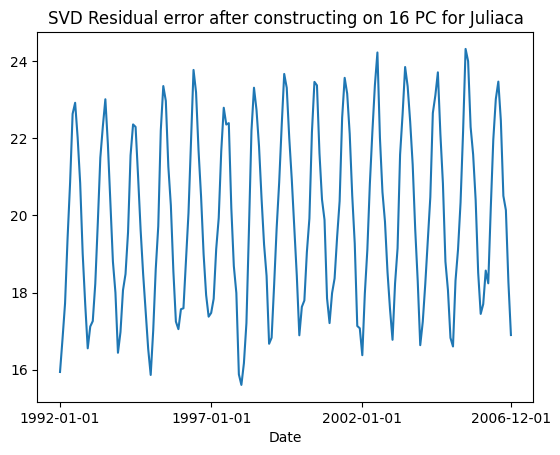

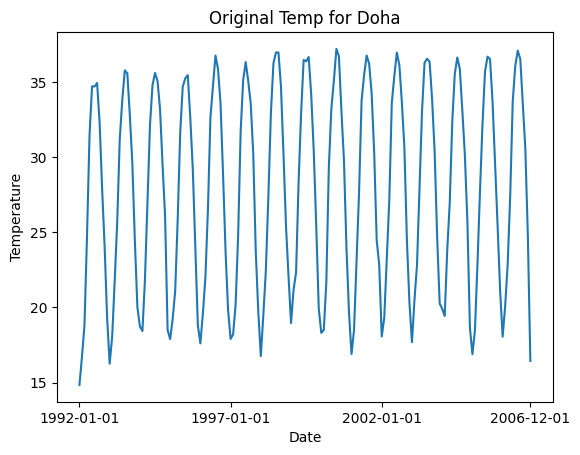

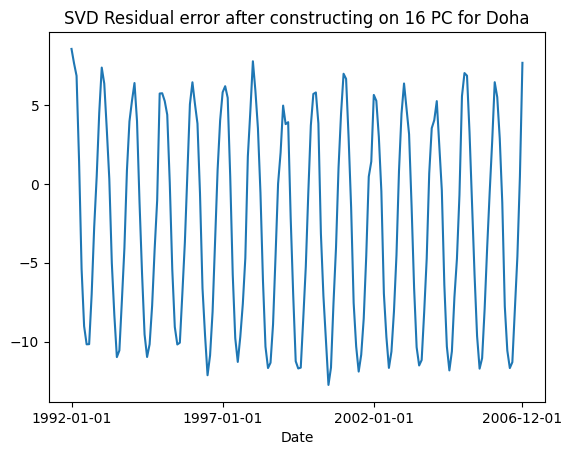

In [ ]:
for city in cities:
  plot_city_figures_SVD(data_raw, city)

# Part 4: Let's collect another dataset!
Create another dataset similar to the one provided in your handout using the raw information on average temperatures per states

You need to manipulate the data to organize it in the desired format (i.e., the same format that was in previous parts). If there is a missing value for the average temperature of a particular state at a given date, make sure to remove that date completely from the dataset, even if the data of that specific date exists for other states.

You are free to use any tools you like, from Excel to Python! In the end, you should have a new CSV file with more dates (features) compared to the provided dataset. How many features does the final dataset have? How many states are there?


Upload your new dataset (in CSV format) to your colab notebook and repeat part 4. When analyzing the states, you may use `Jilin`, `Nunavut`, `Rio Grande Do Norte`, `Louisiana`, and `Tasmania`.

In [ ]:
# load train.csv to Google Colab
from google.colab import files
uploaded = files.upload()

Saving TemperaturesbyState.csv to TemperaturesbyState.csv


In [ ]:
#The data has been cleaned from extra columns and blanks then arranged in excel, now they will be pivoted in python
import pandas as pd
data_raw_new = pd.read_csv(
    filepath_or_buffer='TemperaturesbyState.csv',
    index_col=0
)
data_raw_new
U_columns = data_raw_new['dt'].unique()
U_columns
U_indices = data_raw_new['State'].unique()
U_indices
data_raw_new_pivot = data_raw_new.pivot_table(index='State', columns='dt', values='AverageTemperature', aggfunc='sum')
data_raw_new_pivot = data_raw_new_pivot[U_columns]
data_raw_new_pivot = data_raw_new_pivot.loc[U_indices]
data_raw_new_pivot

dt          1/1/1963  2/1/1963  3/1/1963  4/1/1963  5/1/1963  6/1/1963  \
State                                                                    
Acre          26.037    25.659    25.506    26.019    25.675    25.097   
Adygey        -1.260     2.380     1.506     8.992    15.204    17.843   
Aga Buryat   -22.297   -16.490    -6.900    -1.146     8.558    13.960   
Alabama        4.234     5.685    14.853    18.815    22.172    25.254   
Alagoas       26.389    26.215    25.830    25.340    24.060    22.792   
...              ...       ...       ...       ...       ...       ...   
Yaroslavl'   -18.650   -12.679   -12.197     2.414    15.048    12.505   
Yevrey       -20.697   -17.472    -6.148     2.557    10.782    16.184   
Yukon        -24.129   -19.783   -17.878    -6.328     3.664     7.780   
Yunnan         7.286    10.041    13.768    17.398    20.858    20.698   
Zhejiang       2.765     5.534    11.229    16.736    22.544    23.874   

dt          7/1/1963  8/1/1963  9/1/1963  10/1/1963  ...  11/1/2012  \
State                                                ...              
Acre          25.382    27.432    27.706     27.393  ...     27.393   
Adygey        22.220    21.487    17.756     10.716  ...      7.324   
Aga Buryat    17.899    16.316     8.011     -1.363  ...    -12.900   
Alabama       25.863    26.514    23.083     18.871  ...     11.216   
Alagoas       22.103    22.641    23.853     25.479  ...     27.074   
...              ...       ...       ...        ...  ...        ...   
Yaroslavl'    17.616    16.227    12.858      4.163  ...     -0.254   
Yevrey        20.655    18.919    11.894      2.443  ...     -8.168   
Yukon         11.404    10.530     3.584     -4.766  ...    -22.696   
Yunnan        21.497    20.927    20.737     15.778  ...     14.213   
Zhejiang      27.800    27.806    24.726     17.307  ...     12.306   

dt          12/1/2012  1/1/2013  2/1/2013  3/1/2013  4/1/2013  5/1/2013  \
State                                                                     
Acre           26.318    26.587    26.318    26.386    26.398    26.034   
Adygey          0.191     0.621     3.661     4.812    11.363    18.222   
Aga Buryat    -26.094   -26.128   -22.200   -11.992    -0.501    11.464   
Alabama        10.822    10.284     9.161    10.226    17.067    20.619   
Alagoas        27.021    27.137    27.453    27.753    26.681    25.434   
...               ...       ...       ...       ...       ...       ...   
Yaroslavl'    -11.730   -10.928    -5.743   -10.101     3.852    14.291   
Yevrey        -22.980   -24.428   -19.210   -10.765     1.798    13.136   
Yukon         -28.727   -22.899   -18.238   -17.453   -10.751     2.858   
Yunnan         10.254     9.053    13.715    15.767    17.833    19.925   
Zhejiang        6.633     5.120     7.867    12.116    15.710    21.634   

dt          6/1/2013  7/1/2013  8/1/2013  
State                                     
Acre          26.033    24.807    25.378  
Adygey        20.221    21.937    22.087  
Aga Buryat    15.842    18.194    15.982  
Alabama       26.072    25.952    26.107  
Alagoas       24.420    23.475    23.642  
...              ...       ...       ...  
Yaroslavl'    18.411    18.281    16.881  
Yevrey        18.749    21.207    19.070  
Yukon         12.044    12.458    11.347  
Yunnan        21.860    21.529    21.095  
Zhejiang      24.679    29.272    29.202  

[241 rows x 608 columns]

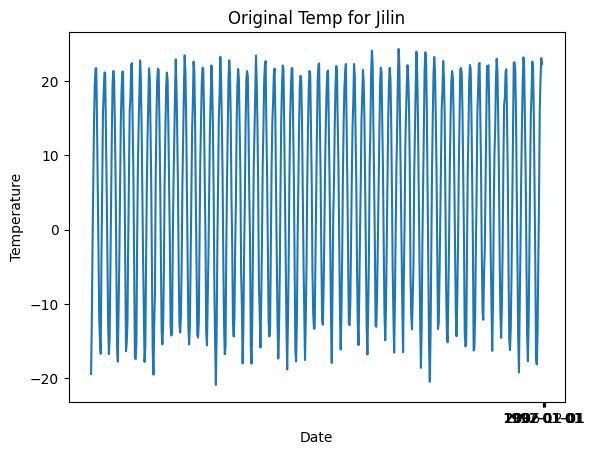

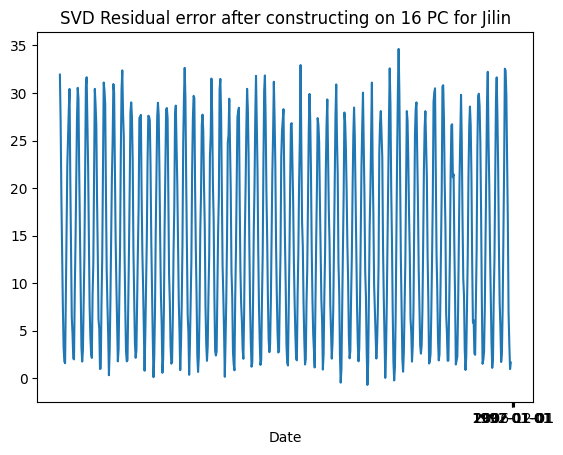

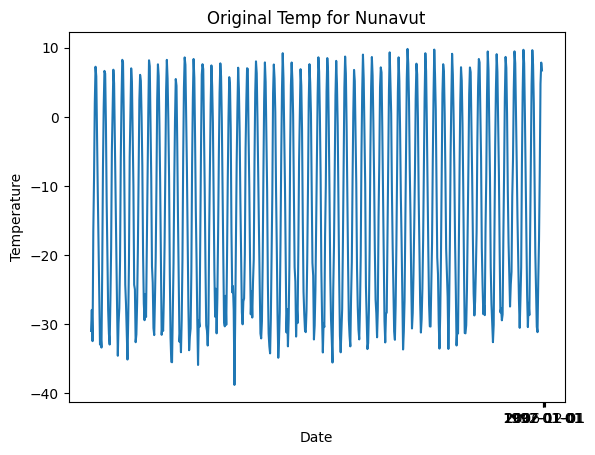

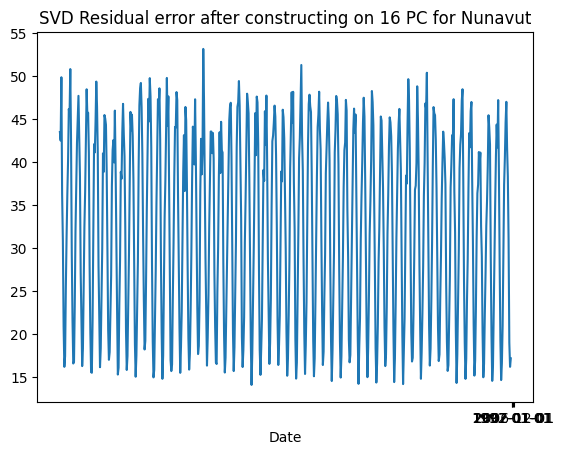

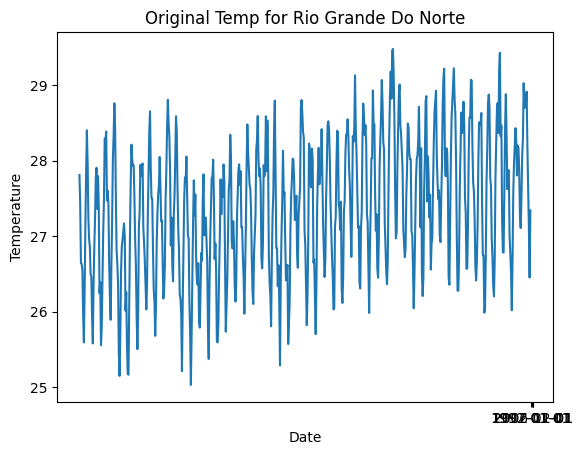

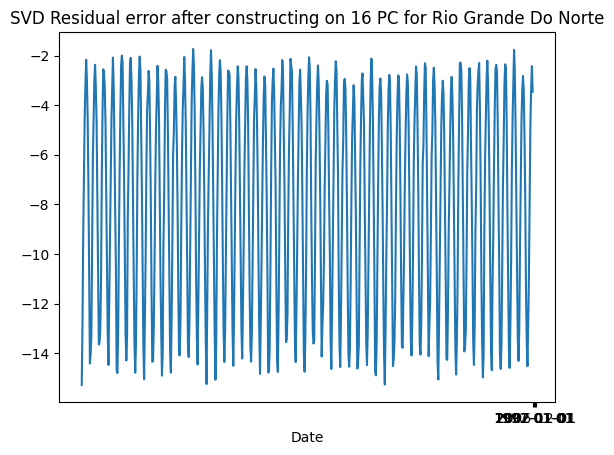

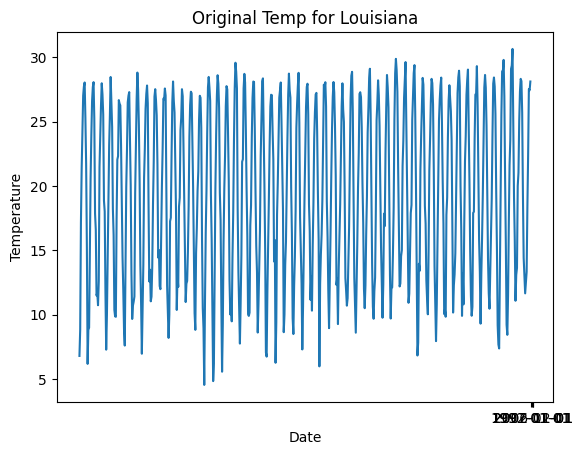

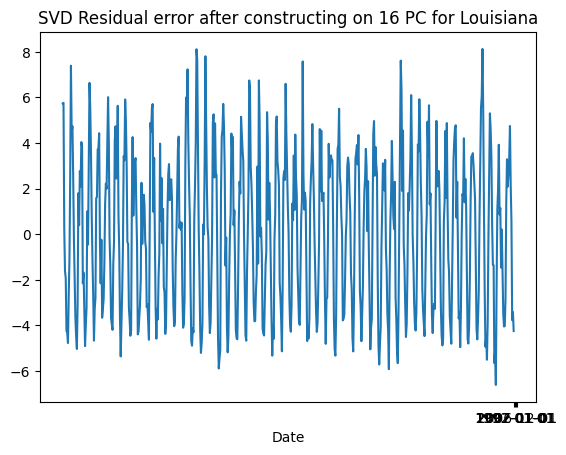

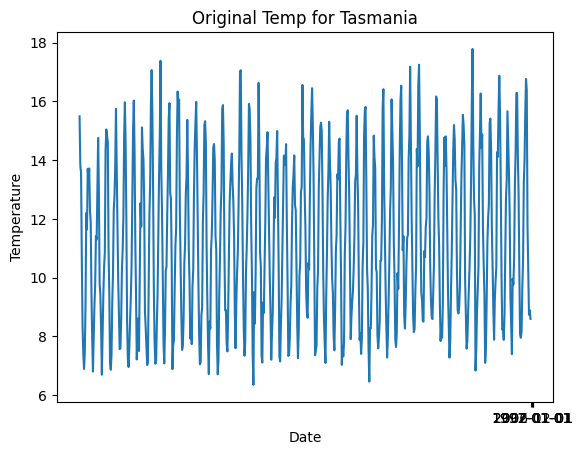

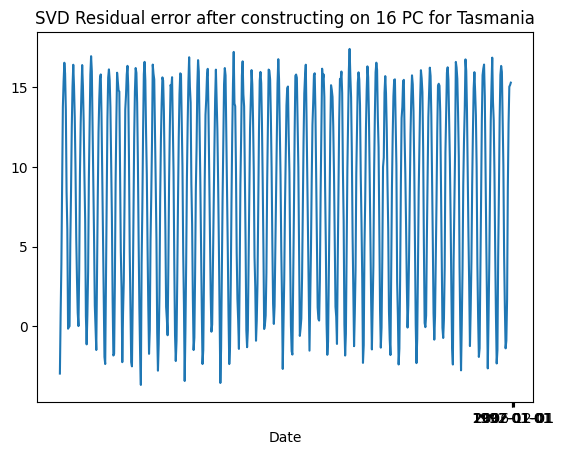

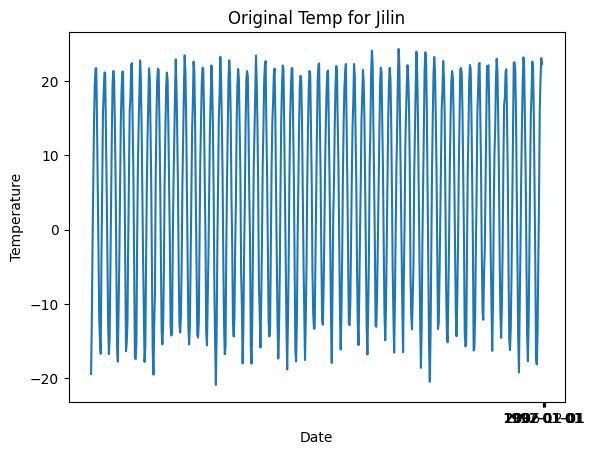

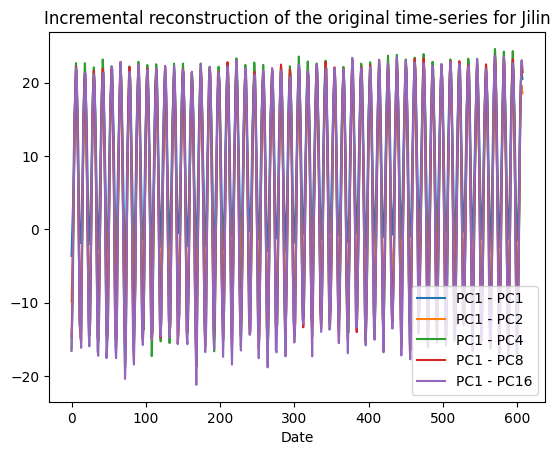

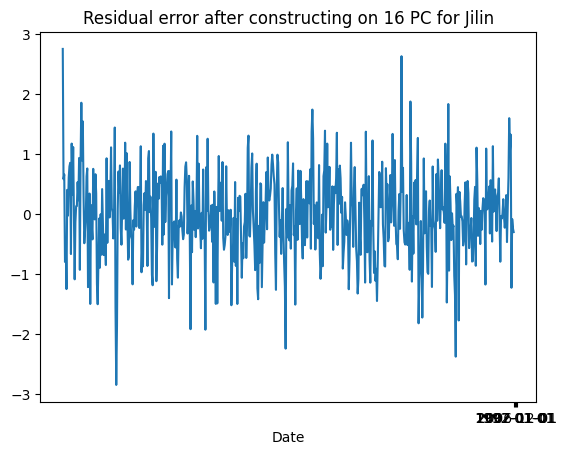

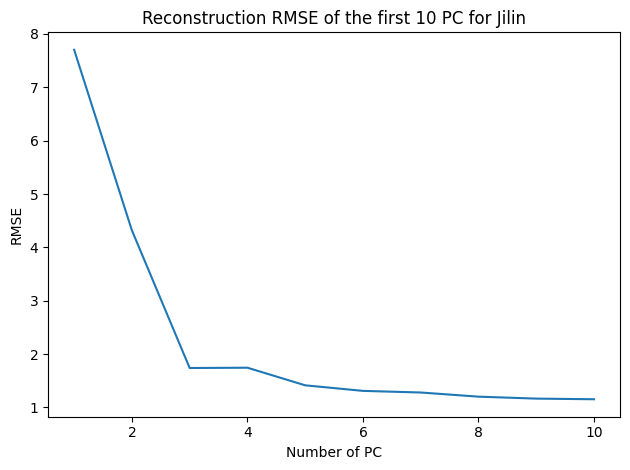

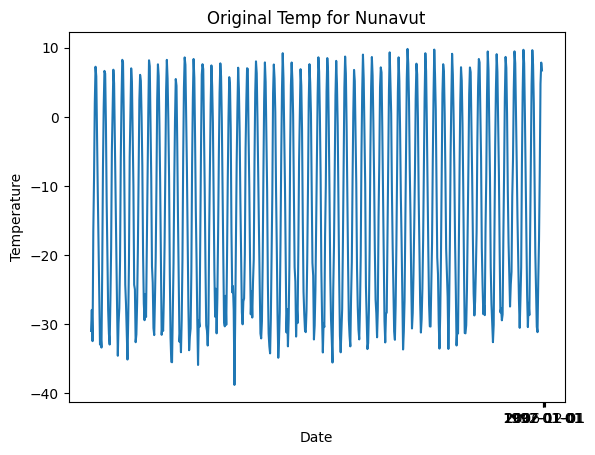

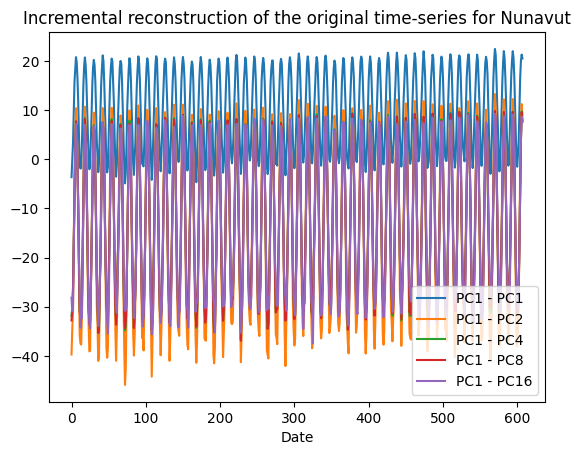

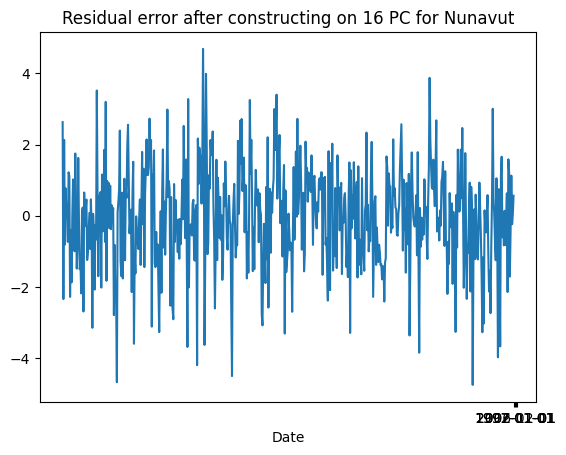

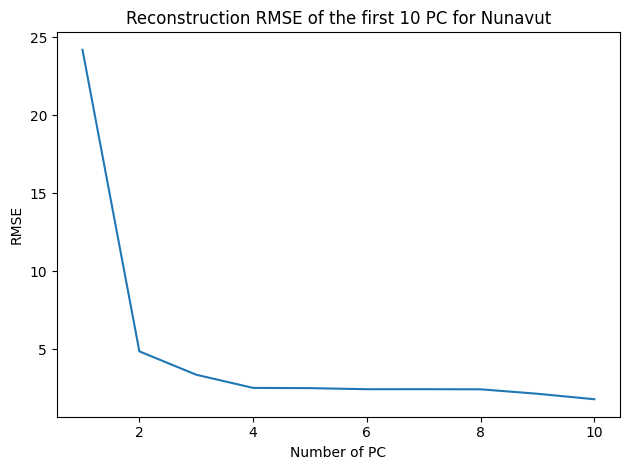

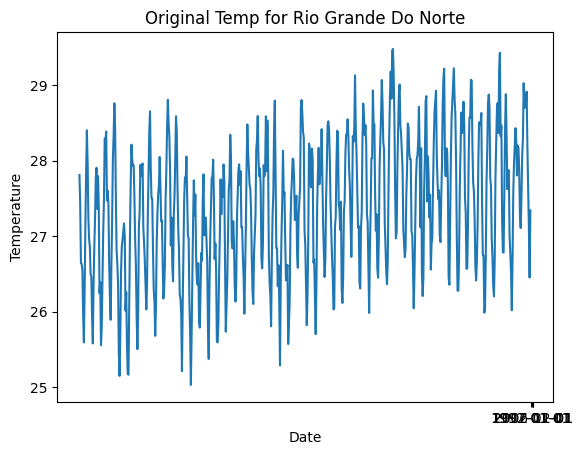

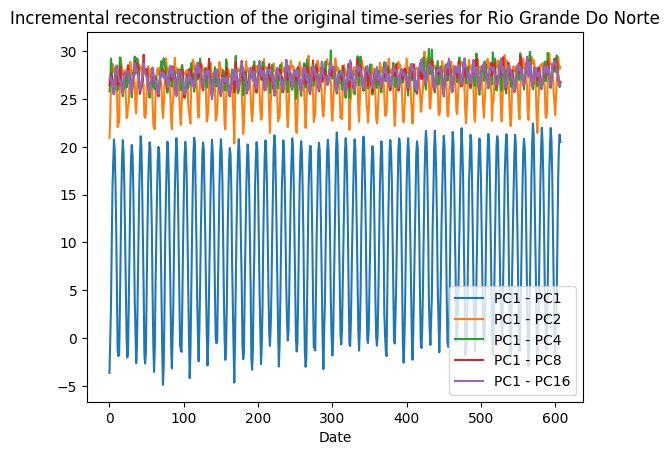

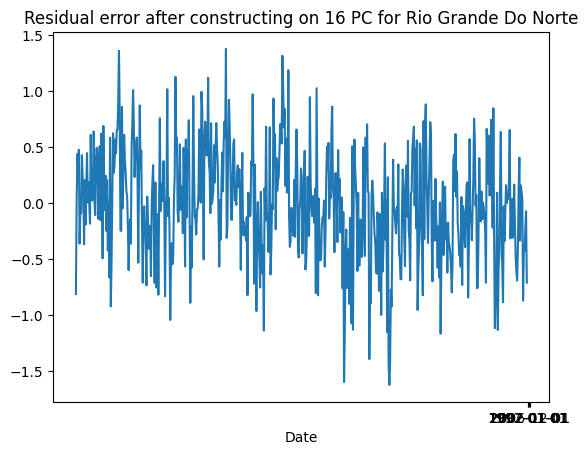

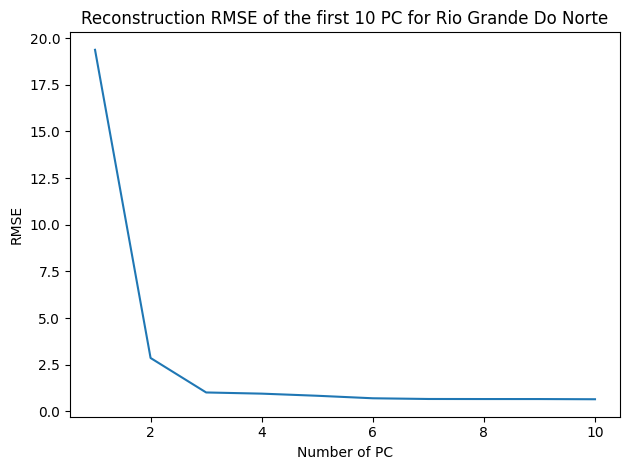

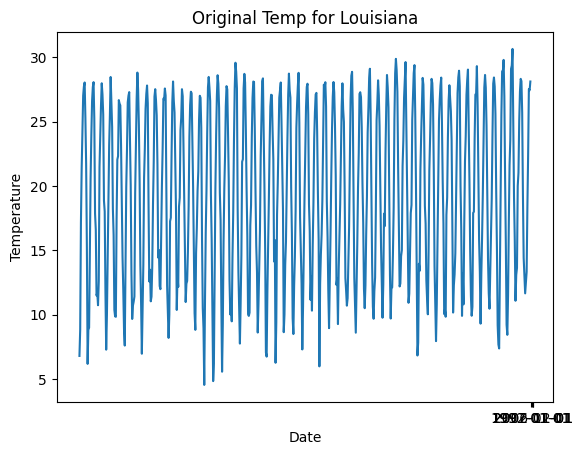

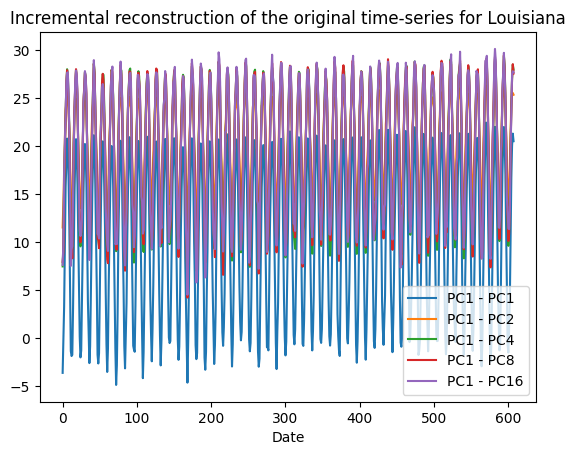

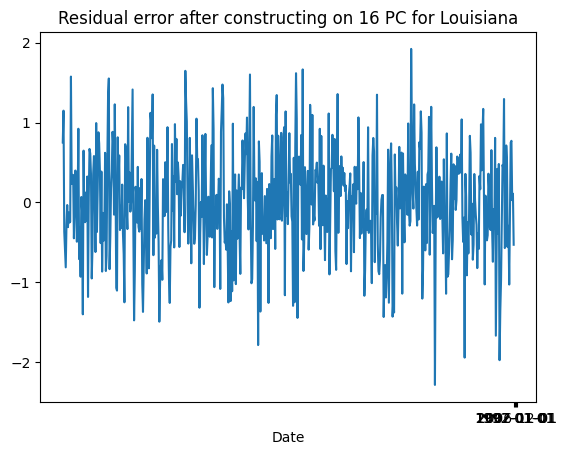

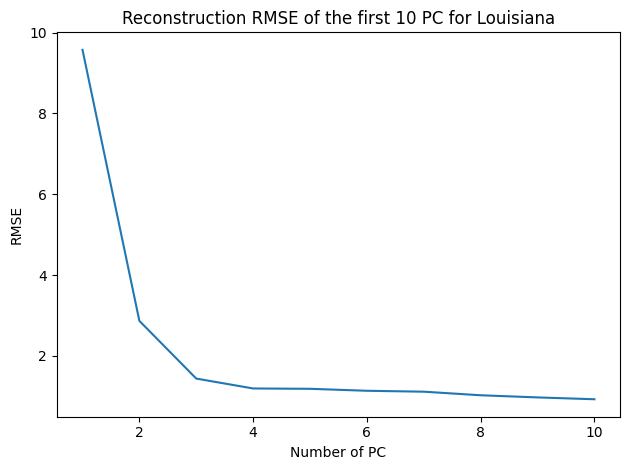

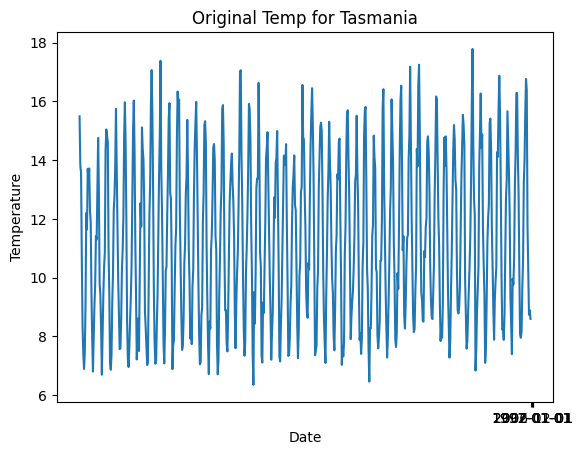

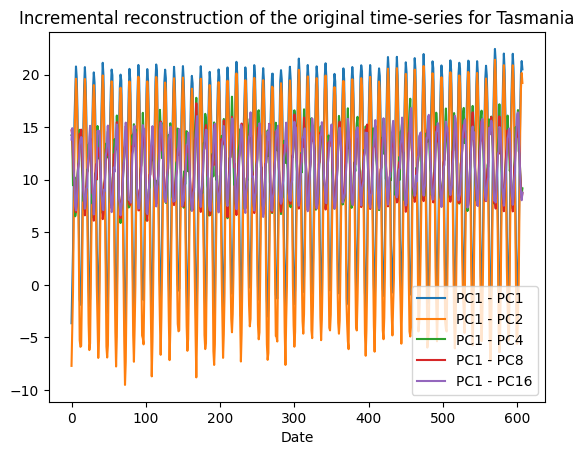

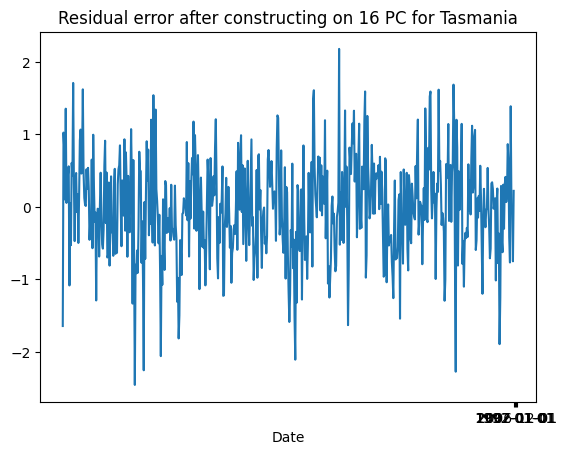

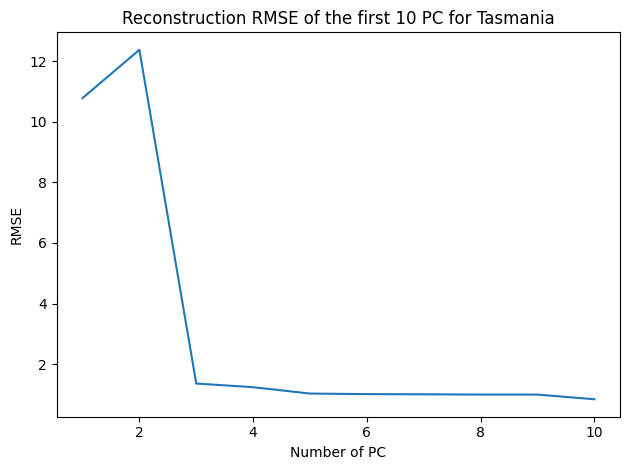

In [ ]:
States = ['Jilin', 'Nunavut', 'Rio Grande Do Norte', 'Louisiana', 'Tasmania']
for state in States:
  plot_city_figures_SVD(data_raw_new_pivot, state)

for state in States:
  plot_city_figures(data_raw_new_pivot, state)